In [123]:
import math
from pathlib import Path
import sys
import numpy as np
import pandas as pd
from scipy import stats
import statistics

from sklearn.model_selection import train_test_split
import seaborn as sns

In [124]:
import tcremb.data_proc as data_proc

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
outputs_path = 'data/data_prebuilt/'

In [127]:
#tcr_columns_paired = {'single': ['cdr3aa','v','j','chain'],'paired': {'TRA': ['a_cdr3aa', 'TRAV', 'TRAJ'],'TRB': [ 'b_cdr3aa', 'TRBV', 'TRBJ']}}
tcr_columns_paired = {'single': ['cdr3aa','v','j','chain'],'paired': {'TRA': ['a_cdr3aa', 'a_v', 'a_j'],'TRB': [ 'b_cdr3aa', 'b_v', 'b_j']}}
tcr_columns = ['cdr3aa','v','j','chain']
clonotype_id_column = 'cloneId'
clonotype_index= 'clonotype_index'
annotation_id = 'annotId'
pairing_id = 'barcode'
annotation_tcr_id_columns_dict = {'TRA': 'cloneId','TRB': 'cloneId','TRA_TRB': {'TRA':'cloneId_TRA', 'TRB':'cloneId_TRB'}}

## Prototypes generated

### TRA

In [137]:
chain = 'TRA'

In [138]:
n=10000
m = 3000
data_raw_path = f'data/olga_generated/olga_human{chain}_{n}.txt'
data_output_path = outputs_path + f'olga_human{chain}.txt'

In [139]:
data_output_path

'data/data_preped/olga_humanTRA.txt'

In [140]:
data = pd.read_csv(data_raw_path,sep='\t',header=None)
data = data.rename({0:'cdr3nt',1:'cdr3aa',2:'v',3:'j'},axis=1)

In [141]:
data_prebuilt = data_proc.remove_asterisk(data, ['cdr3aa','v','j'])
data_prebuilt = data_proc.add_allele(data, ['cdr3aa','v','j'])
data_prebuilt = data_proc.remove_backslash(data_prebuilt, ['cdr3aa','v','j'])
data_prebuilt = data_proc.filter_clones_data(data_prebuilt, ['cdr3aa','v','j'])
data_prebuilt = data_proc.filter_segments(data_prebuilt)
data_prebuilt.shape

(8286, 4)

In [142]:
data_prebuilt = data_prebuilt.drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)

In [143]:
data_prebuilt = data_prebuilt.sample(m).reset_index(drop=True)

In [144]:
#data_prebuilt.to_csv(data_output_path, sep='\t',header=False)
data_prebuilt.to_csv(data_output_path, sep='\t')

### TRB

In [145]:
chain='TRB'

In [146]:
n=10000
m=3000
data_raw_path = f'data/olga_generated/olga_human{chain}_{n}.txt'
data_output_path = outputs_path + f'olga_human{chain}.txt'

In [147]:
data = pd.read_csv(data_raw_path,sep='\t',header=None)
data = data.rename({0:'cdr3nt',1:'cdr3aa',2:'v',3:'j'},axis=1)

In [148]:
data_prebuilt = data_proc.remove_asterisk(data, ['cdr3aa','v','j'])
data_prebuilt = data_proc.add_allele(data, ['cdr3aa','v','j'])
data_prebuilt = data_proc.remove_backslash(data_prebuilt, ['cdr3aa','v','j'])
data_prebuilt = data_proc.filter_clones_data(data_prebuilt, ['cdr3aa','v','j'])
data_prebuilt = data_proc.filter_segments(data_prebuilt)
data_prebuilt.shape

(10000, 4)

In [149]:
data_prebuilt = data_prebuilt.drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)

In [150]:
data_prebuilt = data_prebuilt.sample(m).reset_index(drop=True)

In [151]:
data_prebuilt

,cdr3nt,cdr3aa,v,j
0,TGTGCCAGCAGTTACCGTTATGGGCCCACAGGATCTAGCAATCAGC...,CASSYRYGPTGSSNQPQHF,TRBV6-9*01,TRBJ1-5*01
1,TGTGCCAGCAGTTTCTGGGCCCTATTCGAGCAGTACTTC,CASSFWALFEQYF,TRBV27*01,TRBJ2-7*01
2,TGCGCCAGCACCCCCGTTCGGGGTGGTAGCAATCAGCCCCAGCATTTT,CASTPVRGGSNQPQHF,TRBV4-3*01,TRBJ1-5*01
3,TGCGCCAGCAGCCAAGGGCTCAATAGGAACGAGCAGTACTTC,CASSQGLNRNEQYF,TRBV4-3*01,TRBJ2-7*01
4,TGTGCCAGCAGGCCCCGGGACAGGCCCACTATGAACACTGAAGCTT...,CASRPRDRPTMNTEAFF,TRBV12-3*01,TRBJ1-1*01
...,...,...,...,...
2995,TGTGCCAGCAGCTCTCCCGGACAGAATGAGATCTACGAGCAGTACTTC,CASSSPGQNEIYEQYF,TRBV7-9*01,TRBJ2-7*01
2996,TGCAGTGCCTGCCCGGGACAGGGGGGACAAGAGACCCAGTACTTC,CSACPGQGGQETQYF,TRBV20-1*01,TRBJ2-5*01
2997,TGCGCCAGCAGCTTGGAGGACAGGGCCTACGAGCAGTACTTC,CASSLEDRAYEQYF,TRBV5-1*01,TRBJ2-7*01
2998,TGTGCCAGCTTCCACAACAGACTCGGGCTTCCTGAAGATGAGCAGT...,CASFHNRLGLPEDEQFF,TRBV9*01,TRBJ2-1*01


In [152]:
#data_prebuilt.to_csv(data_output_path, sep='\t',header=False)
data_prebuilt.to_csv(data_output_path, sep='\t')

In [ ]:
### mouse

In [6]:
chain='TRA'

In [ ]:
n=10000
m=3000
data_raw_path = f'data/olga_generated/olga_mouse{chain}_{n}.txt'
data_output_path = outputs_path + f'olga_mouse{chain}.txt'

data = pd.read_csv(data_raw_path,sep='\t',header=None)
data = data.rename({0:'cdr3nt',1:'cdr3aa',2:'v',3:'j'},axis=1)

data_prebuilt = data_proc.remove_asterisk(data, ['cdr3aa','v','j'])
data_prebuilt = data_proc.add_allele(data, ['cdr3aa','v','j'])
data_prebuilt = data_proc.remove_backslash(data_prebuilt, ['cdr3aa','v','j'])
data_prebuilt = data_proc.filter_clones_data(data_prebuilt, ['cdr3aa','v','j'])
data_prebuilt = data_proc.filter_segments(data_prebuilt, segments_path='../mirpy/mirpy/mir/resources/segments.txt',organism='MacacaMulatta' )
data_prebuilt.shape

data_prebuilt = data_prebuilt.drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)

data_prebuilt = data_prebuilt.sample(m).reset_index(drop=True)

data_prebuilt.to_csv(data_output_path, sep='\t')

In [13]:
data_prebuilt

,cdr3nt,cdr3aa,v,j


In [10]:
d = pd.read_csv('../mirpy/mirpy/mir/resources/segments.txt',sep='\t')

In [11]:
d

,organism,gene,stype,id,refpoint,seqnt,cdr1_start,cdr1_end,cdr2_start,cdr2_end,cdr2.5_start,cdr2.5_end
0,HomoSapiens,TRA,Joining,TRAJ10*01,29,ATACTCACGGGAGGAGGAAACAAACTCACCTTTGGGACAGGCACTC...,-1,-1,-1,-1,-1,-1
1,HomoSapiens,TRA,Joining,TRAJ11*01,25,TGAATTCAGGATACAGCACCCTCACCTTTGGGAAGGGGACTATGCT...,-1,-1,-1,-1,-1,-1
2,HomoSapiens,TRA,Joining,TRAJ12*01,25,GGATGGATAGCAGCTATAAATTGATCTTCGGGAGTGGGACCAGACT...,-1,-1,-1,-1,-1,-1
3,HomoSapiens,TRA,Joining,TRAJ13*01,28,TGAATTCTGGGGGTTACCAGAAAGTTACCTTTGGAATTGGAACAAA...,-1,-1,-1,-1,-1,-1
4,HomoSapiens,TRA,Joining,TRAJ14*01,17,ATTTATAGCACATTCATCTTTGGGAGTGGGACAAGATTATCAGTAA...,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
442,MacacaMulatta,TRB,Variable,TRBV7-5*01,276,GGTGCTGGAGTCTCCCAGTCCCCGAGGTACAAAGTCACGAAGAGGG...,78,93,144,162,207,219
443,MacacaMulatta,TRB,Variable,TRBV7-6*01,276,GGTGCTAGAGTCTCCCAGTCTCCAAGGTACAAAGTCACAAAGAGGG...,78,93,144,162,207,219
444,MacacaMulatta,TRB,Variable,TRBV7-7*01,276,GGTGCTGGAGTCTCCCAGTCCCCAAGGTACAAAGTCACAGAGAGGG...,78,93,144,162,207,219
445,MacacaMulatta,TRB,Variable,TRBV7-9*01,276,GGTGCTGGAGTCTCCCAGTCTCCCAGGTACAAAGTAATAAAGAAGG...,78,93,144,162,207,219


In [16]:
chain='TRB'

In [17]:
n=10000
m=3000
data_raw_path = f'data/olga_generated/olga_mouse{chain}_{n}.txt'
data_output_path = outputs_path + f'olga_mouse{chain}.txt'

In [18]:
data = pd.read_csv(data_raw_path,sep='\t',header=None)
data = data.rename({0:'cdr3nt',1:'cdr3aa',2:'v',3:'j'},axis=1)

In [19]:
data

,cdr3nt,cdr3aa,v,j
0,TGTGCCAGCAGTTGGGACTGGTATGAACAGTACTTC,CASSWDWYEQYF,TRBV13-1,TRBJ2-7
1,TGTGCCAGCAGCTACCGGACAGACAACCAGGCTCCGCTTTTT,CASSYRTDNQAPLF,TRBV4,TRBJ1-5
2,TGTGCCAGCGGTGACGGAGGTGCAAACTCCGACTACACCTTC,CASGDGGANSDYTF,TRBV13-2,TRBJ1-2
3,TGTGCCAGCGGTGATGCTCAGGGGACAAACACAGAAGTCTTCTTT,CASGDAQGTNTEVFF,TRBV13-2,TRBJ1-1
4,TGTGCTAGCAGTCGGGGGGGCGGAAACCAAGACACCCAGTACTTT,CASSRGGGNQDTQYF,TRBV17,TRBJ2-5
...,...,...,...,...
9995,TGTGCCAGCAGCCAAAAACCGGGACTGGGGGACCAAGACACCCAGT...,CASSQKPGLGDQDTQYF,TRBV5,TRBJ2-5
9996,TGTGCCAGCTCTAACAGGGATGAACAGTACTTC,CASSNRDEQYF,TRBV12-1,TRBJ2-7
9997,TGTGCCAGCAGCCAAGTGGGACAGGGGGCGGAAGAAAACACAGAAG...,CASSQVGQGAEENTEVFF,TRBV5,TRBJ1-1
9998,TGTGCCAGCAGTCAGGGGGGACAAGACACCCAGTACTTT,CASSQGGQDTQYF,TRBV26,TRBJ2-5


In [20]:
data_prebuilt = data_proc.remove_asterisk(data, ['cdr3aa','v','j'])
data_prebuilt = data_proc.add_allele(data_prebuilt, ['cdr3aa','v','j'])
data_prebuilt = data_proc.remove_backslash(data_prebuilt, ['cdr3aa','v','j'])
data_prebuilt = data_proc.filter_clones_data(data_prebuilt, ['cdr3aa','v','j'])
print(data_prebuilt.shape)
data_prebuilt = data_proc.filter_segments(data_prebuilt, segments_path='../mirpy/mirpy/mir/resources/segments.txt',organism='MacacaMulatta' )
print(data_prebuilt.shape)

(10000, 4)
(2961, 4)


In [ ]:
data_prebuilt = data_prebuilt.drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)

In [ ]:
data_prebuilt = data_prebuilt.sample(m).reset_index(drop=True)

In [ ]:
data_prebuilt.to_csv(data_output_path, sep='\t')

## VDJdb

In [287]:
label = 'antigen.epitope'
label_s = 'antigen.species'

In [288]:
data_raw_path = 'data/vdjdb_full.txt'
data_tra_output_path = outputs_path +'VDJdb_data_TRA.csv'
data_trb_output_path = outputs_path +'VDJdb_data_TRB.csv'

prototypes_tra_output_path = outputs_path +'VDJdb_prototypes_TRA.txt'
prototypes_trb_output_path = outputs_path +'VDJdb_prototypes_TRB.txt'


data_output_path = outputs_path +'VDJdb_data_paired.csv'
data_output_path_example = outputs_path +'VDJdb_data_paired_example.csv'
data_output_path_example_2 = outputs_path +'VDJdb_data_paired_example_2.csv'
#data_train_output_path = outputs_path +'VDJdb_data_train.csv'
#data_test_output_path = outputs_path +'VDJdb_data_test.csv'

In [289]:
data = pd.read_csv(data_raw_path,sep='\t')

#data = data.rename({'cdr3.alpha':'a_cdr3aa','v.alpha':'TRAV','j.alpha':'TRAJ','cdr3.beta':'b_cdr3aa','v.beta':'TRBV','j.beta':'TRBJ'},axis=1)
data = data.rename({'cdr3.alpha':'a_cdr3aa','v.alpha':'a_v','j.alpha':'a_j','cdr3.beta':'b_cdr3aa','v.beta':'b_v','j.beta':'b_j'},axis=1)



### Assign data id

In [290]:
data = data_proc.annot_id(data, clonotype_index)
data.shape

(62177, 35)

In [291]:
data.columns

Index(['a_cdr3aa', 'a_v', 'a_j', 'b_cdr3aa', 'b_v', 'd.beta', 'b_j', 'species',
       'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'method.identification',
       'method.frequency', 'method.singlecell', 'method.sequencing',
       'method.verification', 'meta.study.id', 'meta.cell.subset',
       'meta.subject.cohort', 'meta.subject.id', 'meta.replica.id',
       'meta.clone.id', 'meta.epitope.id', 'meta.tissue', 'meta.donor.MHC',
       'meta.donor.MHC.method', 'meta.structure.id', 'cdr3fix.alpha',
       'cdr3fix.beta', 'vdjdb.score', 'clonotype_index'],
      dtype='object')

### data proc

In [292]:
data_prebuilt = data.copy()


data_prebuilt = data_prebuilt[-data_prebuilt['reference.id'].str.startswith('https://www.10xgenomics',na=False)].reset_index(drop=True)
print(data_prebuilt.shape)
data_prebuilt = data_prebuilt[data_prebuilt['species']=='HomoSapiens']
print(data_prebuilt.shape)


#050624data_prebuilt = data_proc.remove_backslash(data_prebuilt,tcr_columns_paired['paired']['TRA'])
#050624data_prebuilt = data_proc.remove_backslash(data_prebuilt,tcr_columns_paired['paired']['TRB'])
#050624data_prebuilt.shape

(41819, 35)
(36627, 35)


In [293]:
#050624data_prebuilt = data_proc.remove_asterisk(data_prebuilt, tcr_columns_paired['paired']['TRA'])
#050624data_prebuilt = data_proc.remove_asterisk(data_prebuilt, tcr_columns_paired['paired']['TRB'])
#050624data_prebuilt.shape

In [294]:
#data_prebuilt = data_proc.filter_segments(data_prebuilt, v='TRAV', j='TRAJ')
#data_prebuilt = data_proc.filter_segments(data_prebuilt, v='TRBV', j='TRBJ')
#36391
#data_prebuilt.shape

### frequent labels

In [295]:
data_prebuilt_example = data_prebuilt[data_prebuilt[label].isin(['GLCTLVAML','GILGFVFTL','NLVPMVATV'])].reset_index(drop=True)
data_prebuilt_example_2 = data_proc.freq_labels(label, clonotype_index, data_prebuilt, n = 3)
data_prebuilt = data_proc.freq_labels(label, clonotype_index, data_prebuilt, n = 15)
#data_prebuilt = data_proc.freq_labels_tr_list(label, clonotype_index, data_prebuilt, [10,20,30,50,100,500,1000])
data_prebuilt = data_proc.freq_labels(label_s, clonotype_index, data_prebuilt, n = 15)
#data_prebuilt = data_proc.freq_labels_tr_list(label_s, clonotype_index, data_prebuilt, [10,20,30,50,100,500,1000])

### save

In [297]:
data_output_path_example

'data/data_prebuilt/VDJdb_data_paired_example.csv'

In [299]:
cols = ['a_cdr3aa', 'a_v', 'a_j', 'b_cdr3aa', 'b_v', 'd.beta', 'b_j',
       'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope',
       'antigen.gene', 'antigen.species', 'reference.id',clonotype_index]

In [300]:
data_prebuilt_example[cols].to_csv(data_output_path_example, sep='\t',index=False)

In [278]:
data_prebuilt_example_2 = data_prebuilt_example_2[data_prebuilt_example_2['antigen.epitope_freq']!='other'].reset_index(drop=True)
data_prebuilt_example_2 = data_prebuilt_example_2[cols]

In [279]:
data_prebuilt_example_2[cols].to_csv(data_output_path_example_2, sep='\t',index=False)

In [280]:
cols = ['a_cdr3aa', 'a_v', 'a_j', 'b_cdr3aa', 'b_v', 'd.beta', 'b_j',
       'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope',
       'antigen.gene', 'antigen.species', 'reference.id',clonotype_index,
       'antigen.epitope_freq', 'antigen.species_freq']

#cols = ['a_cdr3aa', 'TRAV', 'TRAJ', 'b_cdr3aa', 'TRBV', 'd.beta', 'TRBJ',
#       'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope',
#       'antigen.gene', 'antigen.species', 'reference.id','data_id',
#       'antigen.epitope_freq', 'antigen.species_freq']

In [281]:
data_prebuilt = data_prebuilt[cols]

In [282]:
data_prebuilt.to_csv(data_output_path, sep='\t',index=False)

In [146]:
data_prebuilt_a = data_prebuilt[~data_prebuilt['a_cdr3aa'].isna()].drop_duplicates(tcr_columns_paired['paired']['TRA']).reset_index(drop=True)
data_prebuilt_a

,a_cdr3aa,a_v,a_j,b_cdr3aa,b_v,d.beta,b_j,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,clonotype_index,antigen.epitope_freq,antigen.species_freq
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,0,other,HIV-1
1,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,2,other,HIV-1
2,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,3,other,HIV-1
3,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,4,other,HIV-1
4,CATVLRMDSSYKLIF,TRAV3*01,NaN,NaN,NaN,NaN,NaN,HomoSapiens,HLA-B*07:02,B2M,MHCI,TPRVTGGGAM,pp65,CMV,PMID:12165524,402,other,CMV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12326,CIVYNNDMRF,TRAV26-1*01,TRAJ43*01,CASSFRSTDTQYF,TRBV7-2*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62171,other,Wheat
12327,CMDEGGSNYKLTF,TRAV26-1*01,TRAJ53*01,CASSVRSTDTQYF,TRBV7-2*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62172,other,Wheat
12328,CSLYNNNDMRF,TRAV26-1*01,TRAJ43*01,CASSLRYTDTQYF,TRBV7-2*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62173,other,Wheat
12329,CALSTDSWGKLQF,TRAV6*01,TRAJ24*01,CASSPGQGGDNEQFF,TRBV7-3*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62174,other,Wheat


In [147]:
data_prebuilt_b = data_prebuilt[~data_prebuilt['b_cdr3aa'].isna()].drop_duplicates(tcr_columns_paired['paired']['TRB']).reset_index(drop=True)
data_prebuilt_b

,a_cdr3aa,a_v,a_j,b_cdr3aa,b_v,d.beta,b_j,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,clonotype_index,antigen.epitope_freq,antigen.species_freq
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,0,other,HIV-1
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,1,other,HIV-1
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,2,other,HIV-1
3,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,3,other,HIV-1
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,4,other,HIV-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24104,CIVWNNDMRF,TRAV26-1*01,TRAJ43*01,CASSLRSTDTQYF,TRBV7-3*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62166,other,Wheat
24105,CIVYGGSQGNLIF,TRAV26-1*01,TRAJ42*01,CASSFRSTDTQYF,TRBV7-3*01,NaN,TRBJ2-3*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62168,other,Wheat
24106,CALSTDSWGKLQF,TRAV6*01,TRAJ24*01,CASSPGQGGDNEQFF,TRBV7-3*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62174,other,Wheat
24107,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,CASSLGAGGQETQYF,TRBV5-1*01,NaN,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62175,other,Wheat


In [25]:
#data_prebuilt_train, data_prebuilt_test = train_test_split(data_prebuilt,test_size=0.3)

In [26]:
#data_prebuilt_train.to_csv(data_train_output_path, sep='\t',index=False)
#data_prebuilt_test.to_csv(data_test_output_path, sep='\t',index=False)

In [148]:
list(data_prebuilt[str(label + '_freq')].sort_values().drop_duplicates())

['CINGVCWTV',
 'ELAGIGILTV',
 'FRDYVDRFYKTLRAEQASQE',
 'GILGFVFTL',
 'GLCTLVAML',
 'KRWIILGLNK',
 'LLLGIGILV',
 'LLWNGPMAV',
 'NEGVKAAW',
 'NLVPMVATV',
 'PKYVKQNTLKLAT',
 'SPRWYFYYL',
 'TFEYVSQPFLMDLE',
 'TTDPSFLGRY',
 'YLQPRTFLL',
 'other']

### subsets

In [149]:
samples_n = [10,50,100,500,1000]
freq_col_list = [f'{label}_freq_{i}' for i in samples_n]

In [150]:
data_prebuilt = data_proc.freq_labels_tr_list(label, clonotype_index, data_prebuilt, samples_n)

In [151]:
def filter_save_freq_subsets_paired(data, chain,label,samples_n, freq_col_list, dataset_outputs_suf):
    for i in samples_n:
        if chain=='paired':
            v_output_path = f'{dataset_outputs_suf}_V{i}.csv'
        else:
            v_output_path = f'{dataset_outputs_suf}_{chain}_V{i}.csv'
        print(v_output_path)
        col = f'{label}_freq_{i}'
        df = data[data[col]!='other'].drop(freq_col_list,axis=1)
        df.to_csv(v_output_path, sep='\t',index=False)    

In [152]:
outputs_path

'data/data_prebuilt/'

In [153]:
dataset_outputs_suf = f'{outputs_path}VDJdb_data'
data_proc.filter_save_freq_subsets_paired(data_prebuilt,'paired',label,samples_n, freq_col_list, dataset_outputs_suf)


In [154]:
data_prebuilt_a = data_proc.freq_labels_tr_list(label, clonotype_index, data_prebuilt_a, samples_n)
data_prebuilt_b = data_proc.freq_labels_tr_list(label, clonotype_index, data_prebuilt_b, samples_n)

In [155]:
chain = 'TRA'
dataset_outputs_suf = f'{outputs_path}VDJdb_data'
data_proc.filter_save_freq_subsets_paired(data_prebuilt_a, chain, label,samples_n, freq_col_list, dataset_outputs_suf)

In [156]:
chain = 'TRB'
dataset_outputs_suf = f'{outputs_path}VDJdb_data'
data_proc.filter_save_freq_subsets_paired(data_prebuilt_b, chain, label,samples_n, freq_col_list, dataset_outputs_suf)

<Axes: xlabel='Count', ylabel='antigen.epitope'>

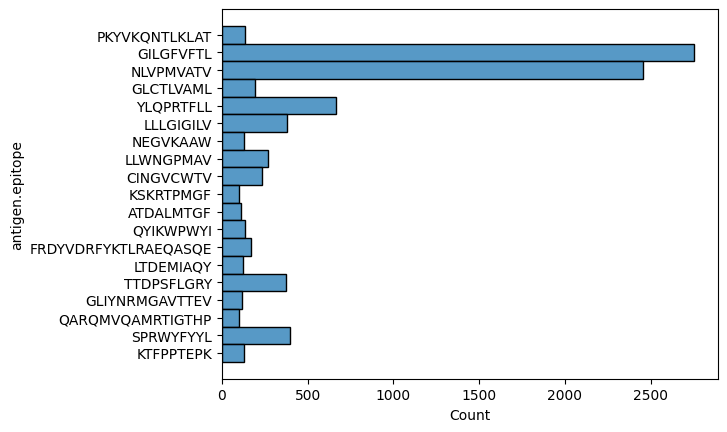

In [157]:


sns.histplot(y=data_prebuilt_a[data_prebuilt_a['antigen.epitope_freq_100']!='other']['antigen.epitope'])

<Axes: xlabel='Count', ylabel='antigen.epitope'>

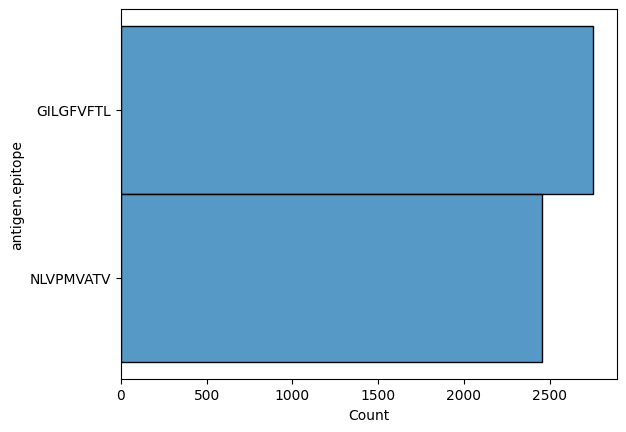

In [158]:
sns.histplot(y=data_prebuilt_a[data_prebuilt_a['antigen.epitope_freq_1000']!='other']['antigen.epitope'])

### Prototypes from VDJdb

In [ ]:
data_prebuilt_b.rename({'':'','':'','':''})

,a_cdr3aa,TRAV,TRAJ,b_cdr3aa,TRBV,d.beta,TRBJ,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,data_id,antigen.epitope_freq,antigen.species_freq
0,CIVRAPGRADMRF,TRAV26-1,TRAJ43,CASSYLPGQGDHYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,0,other,HIV-1
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,1,other,HIV-1
2,CAVPSGAGSYQLTF,TRAV20,TRAJ28,CASSFEPGQGFYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,2,other,HIV-1
3,NaN,NaN,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13,NaN,TRBJ1-5,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,3,other,HIV-1
4,CAYRPPGTYKYIF,TRAV38-2DV8,TRAJ40,CASSALASLNEQFF,TRBV14,NaN,TRBJ2-1,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,4,other,HIV-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23963,CIVWNNDMRF,TRAV26-1,TRAJ43,CASSLRSTDTQYF,TRBV7-3,NaN,TRBJ2-3,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62166,other,Wheat
23964,CIVYGGSQGNLIF,TRAV26-1,TRAJ42,CASSFRSTDTQYF,TRBV7-3,NaN,TRBJ2-3,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQPELPYPQPQL,Gluten,Wheat,PMID:33927715,62168,other,Wheat
23965,CALSTDSWGKLQF,TRAV6,TRAJ24,CASSPGQGGDNEQFF,TRBV7-3,NaN,TRBJ2-1,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62174,other,Wheat
23966,CAPQGATNKLIF,TRAV12-2,TRAJ32,CASSLGAGGQETQYF,TRBV5-1,NaN,TRBJ2-5,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,62175,other,Wheat


### Clean from cross react

In [15]:
data_prebuilt['antigen.species'].drop_duplicates()
## synthetic

0                       InfluenzaA
2                              CMV
3                       SARS-CoV-2
7                              HCV
13                             EBV
16                     HomoSapiens
21                           HIV-1
44                             YFV
88                       HCoV-HKU1
122                          Wheat
127                          DENV2
208                         E.Coli
210                      synthetic
226                        DENV3/4
240                 M.tuberculosis
243                         HTLV-1
251                            HIV
281                          DENV1
387      SelaginellaMoellendorffii
398               TriticumAestivum
1113                  Homo sapiens
1441                           AdV
2235       SaccharomycesCerevisiae
2607                        HPV-16
2767                         HSV-2
3393         PseudomonasAeruginosa
3491                          HIV1
7754                         MCPyV
7965        Pseudomo

In [16]:
data_prebuilt[data_prebuilt['antigen.species']=='synthetic']

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,data_id,antigen.epitope_freq,antigen.species_freq
210,TRA,CAVNFGGGKLIF,HomoSapiens,SMLGIGIVPV,synthetic,synthetic,293,TRAV12-2,TRAJ23,4,6,HLA-A*02:01:48,B2M,MHCI,https://github.com/antigenomics/vdjdb-db/issue...,3,443,other,synthetic
554,TRA,CALSEARGGATNKLIF,HomoSapiens,LMDYWQGQL,synthetic,synthetic,"27000,27007",TRAV19,TRAJ32,5,7,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,1201,other,synthetic
603,TRB,CASSRDFVSNEQYF,HomoSapiens,TMDFYQGQL,synthetic,synthetic,27004,TRBV10-1,TRBJ2-7,4,10,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,1313,other,synthetic
1270,TRA,CAVLSSGGSNYKLTF,HomoSapiens,YLEPGPVTV,synthetic,synthetic,258,TRAV21,TRAJ53,3,5,HLA-A*02:01:48,B2M,MHCI,PMID:26917722,3,2651,other,synthetic
1600,TRA,CALSEARGGATNKLIF,HomoSapiens,GMDYHNGHL,synthetic,synthetic,26997,TRAV19,TRAJ32,5,7,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,3327,other,synthetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34247,TRB,CASSRDTVNTEAFF,HomoSapiens,RLDAMNGQL,synthetic,synthetic,26995,TRBV10-1,TRBJ1-1,4,8,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,71268,other,synthetic
34418,TRA,CALSEAGMDSNYQLIW,HomoSapiens,SMGVTYEM,synthetic,synthetic,26989,TRAV19,TRAJ33,5,8,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,71646,other,synthetic
35065,TRB,CASSRDTVNTEAFF,HomoSapiens,RMDYNNMQM,synthetic,synthetic,26996,TRBV10-1,TRBJ1-1,4,8,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,72984,other,synthetic
35860,TRB,CASSRDFVSNEQYF,HomoSapiens,NMMWFQGQL,synthetic,synthetic,27008,TRBV10-1,TRBJ2-7,4,10,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,74550,other,synthetic


In [17]:
tcr_columns

['cdr3aa', 'v', 'j', 'chain']

In [20]:
data_prebuilt['epi_coint'] = data_prebuilt.groupby(tcr_columns)[clonotype_index].transform('count')

In [21]:
data_prebuilt[data_prebuilt['epi_coint']>1]

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,data_id,antigen.epitope_freq,antigen.species_freq,epi_coint
31,TRB,CASSLVDREELFF,HomoSapiens,QARQMVQAMRTIGTHP,M1,InfluenzaA,0,TRBV5-6,TRBJ1-4,5,10,HLA-DRA*01,HLA-DRB1*01,MHCII,https://github.com/antigenomics/vdjdb-db/issue...,0,69,other,InfluenzaA,2
35,TRA,CAFKAAGNKLTF,HomoSapiens,RFYKTLRAEQASQ,P24,HIV-1,"301,302,303,304",TRAV24,TRAJ17,3,3,"HLA-DRA*01:01:02,HLA-DRA*01:02:03","HLA-DRB1*15:02:02,HLA-DRB1*01:01:01,HLA-DRB1*1...",MHCII,PMID:29884618,3,76,other,HIV-1,3
36,TRB,CASSVVGNEQFF,HomoSapiens,CINGVCWTV,NS3,HCV,1690,TRBV9,TRBJ2-1,5,7,HLA-A*02:01,B2M,MHCI,NaN,0,79,CINGVCWTV,HCV,3
56,TRB,CASSLGQAYEQYF,HomoSapiens,GLCTLVAML,BMLF1,EBV,0,TRBV7-8,TRBJ2-7,5,8,HLA-A*02:01,B2M,MHCI,PMID:28636589,0,128,GLCTLVAML,EBV,5
59,TRB,CASSFGQGGYEQYF,HomoSapiens,SVLYYQNNV,ORF1ab,SARS-CoV-2,0,TRBV13,TRBJ2-7,4,9,HLA-A*02:01,B2M,MHCI,PMID:34793243,0,138,other,SARS-CoV-2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36092,TRB,CASSLEGDQPQHF,HomoSapiens,IPTNFTISV,Spike,SARS-CoV-2,0,TRBV5-1,TRBJ1-5,5,8,HLA-B*07:02,B2M,MHCI,PMID:34793243,0,75044,other,SARS-CoV-2,2
36099,TRA,CALSEAGMDSNYQLIW,HomoSapiens,YMGVVYEM,synthetic,synthetic,26991,TRAV19,TRAJ33,5,8,HLA-A*02:01,B2M,MHCI,PMID:29275860,2,75053,other,synthetic,5
36112,TRB,CASSQRQEGDTQYF,HomoSapiens,APRGPHGGAASGL,NY-ESO,HomoSapiens,27064,TRBV28,TRBJ2-3,4,9,HLA-B*07:02,B2M,MHCI,PMID:29531227,3,75082,other,HomoSapiens,2
36118,TRB,CAISESMGTGTQETQYF,HomoSapiens,GTSGSPIVNR,NS3,DENV1,0,TRBV10-3,TRBJ2-5,5,11,HLA-A*11:01,B2M,MHCI,PMID:28945243,0,75092,other,DENV1,2


In [24]:
data_prebuilt[data_prebuilt['cdr3aa']=='CASSVVGNEQFF']

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,data_id,antigen.epitope_freq,antigen.species_freq,epi_coint
36,TRB,CASSVVGNEQFF,HomoSapiens,CINGVCWTV,NS3,HCV,1690,TRBV9,TRBJ2-1,5,7,HLA-A*02:01,B2M,MHCI,NaN,0,79,CINGVCWTV,HCV,3
16995,TRB,CASSVVGNEQFF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV9,TRBJ2-1,5,7,HLA-A*02,B2M,MHCI,PMID:28423320,0,35368,NLVPMVATV,CMV,3
25187,TRB,CASSVVGNEQFF,HomoSapiens,GLCTLVAML,BMLF1,EBV,27789,TRBV9,TRBJ2-1,5,7,HLA-A*02:01,B2M,MHCI,"PMID:34793243,PMID:28636589,PMID:19017975",0,52445,GLCTLVAML,EBV,3


### prep for atmtcr

In [22]:
atmtcr_trb_train_path = outputs_path + 'vdjdb_trb_atmtcr_train.csv'
atmtcr_trb_test_path = outputs_path + 'vdjdb_trb_atmtcr_test.csv'

In [40]:
data_prebuilt_trb_train = data_prebuilt_train[data_prebuilt_train['chain']=='TRB'].reset_index(drop=True)
data_prebuilt_trb_test = data_prebuilt_test[data_prebuilt_test['chain']=='TRB'].reset_index(drop=True)

In [41]:
data_prebuilt_trb_train_atmtcr = data_prebuilt_trb_train.rename({label:'Epitope','cdr3aa':'TCR'},axis=1)[['Epitope','TCR']]
data_prebuilt_trb_test_atmtcr = data_prebuilt_trb_test.rename({label:'Epitope','cdr3aa':'TCR'},axis=1)[['Epitope','TCR']]

In [42]:
data_prebuilt_trb_train_atmtcr['Binding Affinity']=1
data_prebuilt_trb_test_atmtcr['Binding Affinity']=1

In [43]:
import tcremb.ml_utils as ml_utils
data_prebuilt_trb_train_atmtcr_n = ml_utils.generate_negative_pairs(data_prebuilt_trb_train_atmtcr, len(data_prebuilt_trb_test_atmtcr)*2 , 'TCR', 'Epitope')
data_prebuilt_trb_train_atmtcr_n['Binding Affinity']=0
data_prebuilt_trb_test_atmtcr_n = ml_utils.generate_negative_pairs(data_prebuilt_trb_test_atmtcr, len(data_prebuilt_trb_test_atmtcr)*2 , 'TCR', 'Epitope')
data_prebuilt_trb_test_atmtcr_n['Binding Affinity']=0

In [44]:
data_prebuilt_trb_train_atmtcr = pd.concat([data_prebuilt_trb_train_atmtcr, data_prebuilt_trb_train_atmtcr_n]).reset_index(drop=True)
data_prebuilt_trb_test_atmtcr = pd.concat([data_prebuilt_trb_test_atmtcr, data_prebuilt_trb_test_atmtcr_n]).reset_index(drop=True)


In [48]:
data_prebuilt_trb_test_atmtcr

,Epitope,TCR,Binding Affinity
0,NLVPMVATV,CASSFPLGGTYEQYF,1
1,NLVPMVATV,CASSLGLDTQYF,1
2,NLVPMVATV,CSARDLDRADNTGELFF,1
3,GTSGSPIVNR,CASLSGRAPQHF,1
4,NLVPMVATV,CASSLNYEQYF,1
...,...,...,...
21628,ELAGIGILTV,CASSPGEARGEQFF,0
21629,TTDPSFLGRY,CASSPGTLSTEAFF,0
21630,QYIKWPWYI,CASSSSFLGNQPQHF,0
21631,NLVPMVATV,CASSRFPTGSNNEQFF,0


In [18]:
#data_prebuilt_trb_atmtcr_train, data_prebuilt_trb_atmtcr_test = train_test_split(data_prebuilt_trb_atmtcr,test_size=0.3)

In [50]:
data_prebuilt_trb_train_atmtcr.to_csv(atmtcr_trb_train_path, index=False, header=False)
data_prebuilt_trb_test_atmtcr.to_csv(atmtcr_trb_test_path, index=False, header=False)

## 10x donor

In [243]:
#donor = 'donor1'
#donor = 'donor2'
#donor = 'donor3'
donor = 'donor4'
label = 'top_tetramer'

In [244]:
barcodes_path = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/10x_' + donor + '/filtered_feature_bc_matrix/barcodes.tsv'
features_path = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/10x_' + donor + '/filtered_feature_bc_matrix/features.tsv'
matrix_path = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/10x_' + donor + '/filtered_feature_bc_matrix/matrix.mtx'
annot_path = '/home/ykremlyakova/projects/Archive/tcr_emb_mirpy_old/data/10x_' + donor + '/vdj_v1_hs_aggregated_' + donor + '_all_contig_annotations.csv'

In [245]:
barcode_tetramer_path = f'10x_proc/{donor}_top_tetramer.csv'

In [246]:
matrix_path_preped = outputs_path + '10x_matrix_' + donor + '.txt'
data_output_path = outputs_path + '10x_annot_data_' + donor + '.txt'
data_paired_output_path = outputs_path + '10x_annot_data_paired' + donor + '.txt'

In [247]:
matrix_path_preped

'data/data_prebuilt/10x_matrix_donor4.txt'

### 10x preprocessing - get matrix with values

In [ ]:
### how matrix is preped
barcodes = data_proc.read_barcodes(barcodes_path)

features = data_proc.read_features(features_path)

matrix = data_proc.read_matrix(matrix_path)
## mwrge with barcodes and features
matrix = pd.merge(matrix, barcodes, on="barcode_id")
matrix = pd.merge(matrix, features, on="feature_id")

matrix = data_proc.get_value_matrix(matrix)

matrix = matrix[matrix['type']=='Antibody Capture']
matrix = matrix[matrix['value_type']!='TotalSeqC']

matrix.to_csv(matrix_path_preped,sep='\t', index = False)

### Get top tetramer

In [248]:
barcode_tetramer = pd.read_csv(barcode_tetramer_path)
barcode_tetramer

,barcode,top_tetramer
0,AACCGCGAGTGGGCTA-1,IVTDFSVIK_EBNA-3B_EBV
1,AACGTTGTCCCAAGAT-1,IVTDFSVIK_EBNA-3B_EBV
2,AACTCCCTCTAACTCT-1,IVTDFSVIK_EBNA-3B_EBV
3,AACTGGTTCTGGAGCC-1,IVTDFSVIK_EBNA-3B_EBV
4,AATCGGTCACTCAGGC-1,AVFDRKSDAK_EBNA-3B_EBV
...,...,...
4176,TGGGCGTAGATGAGAG-8,IVTDFSVIK_EBNA-3B_EBV
4177,TGTGTTTGTCCAAGTT-8,IVTDFSVIK_EBNA-3B_EBV
4178,TTCGAAGAGTTATCGC-8,AVFDRKSDAK_EBNA-3B_EBV
4179,TTTATGCAGGGCTTCC-8,IVTDFSVIK_EBNA-3B_EBV


### prep annot

In [249]:
data_annot = pd.read_csv(annot_path,sep=',')

In [250]:
data = pd.merge(data_annot, barcode_tetramer, on = pairing_id)

In [251]:
data = data.rename({'cdr3':'cdr3aa','v_gene':'v','j_gene':'j'},axis=1)

In [252]:
data = data_proc.annot_id(data, clonotype_index)

In [253]:
#050624data_prebuilt = data_proc.remove_asterisk(data, tcr_columns)
#050624data_prebuilt = data_proc.remove_backslash(data_prebuilt, tcr_columns)
#050624data_prebuilt = data_proc.filter_clones_data(data_prebuilt, tcr_columns)
#050624data_prebuilt = data_prebuilt[data_prebuilt['high_confidence']==True]
data_prebuilt = data[data['high_confidence']==True] #050624
data_prebuilt = data_prebuilt[data_prebuilt['is_cell']==True]
data_prebuilt = data_prebuilt[data_prebuilt['chain']!='Multi']

#050624data_prebuilt = data_proc.filter_segments(data_prebuilt)
data_prebuilt.shape

(9477, 20)

### Only 1 barcoce

In [254]:
data_prebuilt = data_prebuilt.sort_values(['umis','reads'],ascending=False).drop_duplicates(['barcode','chain'])
print(data_prebuilt.shape)

(7700, 20)


### frequent labels

In [255]:
label_high = str(label + '_freq')

In [256]:
data_prebuilt = data_proc.freq_labels(label, clonotype_index, data_prebuilt, n = 8)
data_prebuilt = data_proc.freq_labels_tr_list(label, clonotype_index, data_prebuilt, [10,20,30,50,100,500,1000])

### save 

In [257]:
data_prebuilt.to_csv(data_output_path,sep='\t', index = False)

In [258]:
data_prebuilt

,barcode,is_cell,contig_id,high_confidence,length,chain,v,d_gene,j,c_gene,...,top_tetramer,clonotype_index,top_tetramer_freq,top_tetramer_freq_10,top_tetramer_freq_20,top_tetramer_freq_30,top_tetramer_freq_50,top_tetramer_freq_100,top_tetramer_freq_500,top_tetramer_freq_1000
12352,TCATTACGTTGACGTT-3,True,TCATTACGTTGACGTT-3_contig_1,True,678,TRB,TRBV11-2,NaN,TRBJ2-3,TRBC2,...,AVFDRKSDAK_EBNA-3B_EBV,12352,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV
1627,ACTGTCCGTATATGGA-3,True,ACTGTCCGTATATGGA-3_contig_1,True,1087,TRB,TRBV13,TRBD1,TRBJ2-4,TRBC2,...,AVFDRKSDAK_EBNA-3B_EBV,1627,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV
8900,GCATGATAGATCCGAG-6,True,GCATGATAGATCCGAG-6_contig_1,True,690,TRA,TRAV9-2,NaN,TRAJ17,TRAC,...,IVTDFSVIK_EBNA-3B_EBV,8900,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV
9138,GCGAGAATCATGTGGT-6,True,GCGAGAATCATGTGGT-6_contig_1,True,734,TRB,TRBV7-8,TRBD1,TRBJ2-7,TRBC2,...,IVTDFSVIK_EBNA-3B_EBV,9138,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV
9088,GCGACCATCAGTTCGA-4,True,GCGACCATCAGTTCGA-4_contig_1,True,775,TRB,TRBV28,TRBD1,TRBJ1-1,TRBC1,...,AVFDRKSDAK_EBNA-3B_EBV,9088,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,ATTTCTGCATCACGAT-4,True,ATTTCTGCATCACGAT-4_contig_2,True,553,IGL,NaN,NaN,IGLJ5,NaN,...,AVFDRKSDAK_EBNA-3B_EBV,3127,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV
2984,ATGTGTGGTCTGATTG-4,True,ATGTGTGGTCTGATTG-4_contig_3,True,554,NaN,NaN,NaN,NaN,NaN,...,IVTDFSVIK_EBNA-3B_EBV,2984,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV
429,AACTGGTCAGTAGAGC-8,True,AACTGGTCAGTAGAGC-8_contig_5,True,485,IGH,NaN,NaN,NaN,IGHM,...,IVTDFSVIK_EBNA-3B_EBV,429,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV,IVTDFSVIK_EBNA-3B_EBV
5278,CCTCTGATCACTCCTG-4,True,CCTCTGATCACTCCTG-4_contig_3,True,526,IGH,NaN,NaN,NaN,IGHG1,...,AVFDRKSDAK_EBNA-3B_EBV,5278,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV,AVFDRKSDAK_EBNA-3B_EBV


### Map pairs

In [259]:
#data_a = data_prebuilt[data_prebuilt['chain']=='TRA'][['cdr3aa','v','j']+[ pairing_id, label, label_high]].reset_index(drop='True')
data_a = data_prebuilt[data_prebuilt['chain']=='TRA'][['cdr3aa','v','j']+[ pairing_id, label]].reset_index(drop='True')
#data_a = data_a.rename({'cdr3aa':'a_cdr3aa','v':'TRAV','j':'TRAJ'},axis=1)
data_a = data_a.rename({'cdr3aa':'a_cdr3aa','v':'a_v','j':'a_j'},axis=1)
#data_b = data_prebuilt[data_prebuilt['chain']=='TRB'][['cdr3aa','v','j'] + [pairing_id, label, label_high]].reset_index(drop='True')
data_b = data_prebuilt[data_prebuilt['chain']=='TRB'][['cdr3aa','v','j'] + [pairing_id, label]].reset_index(drop='True')
#data_b = data_b.rename({'cdr3aa':'b_cdr3aa','v':'TRBV','j':'TRBJ'},axis=1)
data_b = data_b.rename({'cdr3aa':'b_cdr3aa','v':'b_v','j':'b_j'},axis=1)


In [260]:
data_paired = data_a.merge(data_b,how='outer')
data_paired

,a_cdr3aa,a_v,a_j,barcode,top_tetramer,b_cdr3aa,b_v,b_j
0,CALSDLKAAGNKLTF,TRAV9-2,TRAJ17,GCATGATAGATCCGAG-6,IVTDFSVIK_EBNA-3B_EBV,CASSQDLSRLNTEAFF,TRBV4-3,TRBJ1-1
1,CAVNWEEQGGSYIPTF,TRAV12-2,TRAJ6,CAGATCATCCAAAGTC-4,IVTDFSVIK_EBNA-3B_EBV,CASRVSGSLSYNEQFF,TRBV27,TRBJ2-1
2,CAVDLMKTSYDKVIF,TRAV21,TRAJ50,GACTAACCATACCATG-7,IVTDFSVIK_EBNA-3B_EBV,CASRTGLASTDTQYF,TRBV6-6,TRBJ2-3
3,CAVNSGAAGNKLTF,TRAV21,TRAJ17,GTAGTCAAGGGCTTGA-3,AVFDRKSDAK_EBNA-3B_EBV,NaN,TRBV5-6,TRBJ2-4
4,CAVDLMKTSYDKVIF,TRAV21,TRAJ50,TTTATGCGTATGAATG-4,IVTDFSVIK_EBNA-3B_EBV,CASRTGLASTDTQYF,TRBV6-6,TRBJ2-3
...,...,...,...,...,...,...,...,...
3880,NaN,NaN,NaN,GACCTGGTCATTATCC-4,AVFDRKSDAK_EBNA-3B_EBV,CATSDRLAGGELFF,TRBV24-1,TRBJ2-2
3881,NaN,NaN,NaN,GCGCCAATCGGTTCGG-5,AVFDRKSDAK_EBNA-3B_EBV,CASSNTGGEQFF,TRBV5-1,TRBJ2-1
3882,NaN,NaN,NaN,GGATTACTCGCCGTGA-6,AVFDRKSDAK_EBNA-3B_EBV,CASRTGLASTDTQYF,TRBV6-6,TRBJ2-3
3883,NaN,NaN,NaN,ACATCAGTCCTTGCCA-2,IVTDFSVIK_EBNA-3B_EBV,NaN,NaN,TRBJ2-3


In [261]:
data_a.drop_duplicates('a_cdr3aa')

,a_cdr3aa,a_v,a_j,barcode,top_tetramer
0,CALSDLKAAGNKLTF,TRAV9-2,TRAJ17,GCATGATAGATCCGAG-6,IVTDFSVIK_EBNA-3B_EBV
1,CAVNWEEQGGSYIPTF,TRAV12-2,TRAJ6,CAGATCATCCAAAGTC-4,IVTDFSVIK_EBNA-3B_EBV
2,CAVDLMKTSYDKVIF,TRAV21,TRAJ50,GACTAACCATACCATG-7,IVTDFSVIK_EBNA-3B_EBV
3,CAVNSGAAGNKLTF,TRAV21,TRAJ17,GTAGTCAAGGGCTTGA-3,AVFDRKSDAK_EBNA-3B_EBV
7,CAVYTGGGNKLTF,TRAV21,TRAJ10,TGCCCTACATTGGGCC-3,IVTDFSVIK_EBNA-3B_EBV
...,...,...,...,...,...
3814,CALGRF*CWQQP*ADL,TRAV16,TRAJ38,ATAGACCGTCTAGTGT-7,AVFDRKSDAK_EBNA-3B_EBV
3820,CAVNYARF,TRAV12-2,TRAJ43,CCAGCGACACGAAGCA-6,AVFDRKSDAK_EBNA-3B_EBV
3824,CTSVQQACGTASKLTF,TRAV29DV5,TRAJ44,TTCTACATCAATCTCT-6,AVFDRKSDAK_EBNA-3B_EBV
3825,CAYRRLNMRF,TRAV38-2DV8,TRAJ43,AGGGAGTGTCGGCTCA-2,AVFDRKSDAK_EBNA-3B_EBV


### save pairs

In [262]:
data_paired.to_csv(data_paired_output_path,sep='\t', index = False)

## Prototypes from donor

In [133]:
prototypes_columns = ['cdr3_nt','cdr3aa','v','j']

In [134]:
data_proto_a = data_prebuilt[data_prebuilt['chain']=='TRA']
data_proto_a = data_proto_a[prototypes_columns].drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)
data_proto_b = data_prebuilt[data_prebuilt['chain']=='TRB']
data_proto_b = data_proto_b[prototypes_columns].drop_duplicates(['cdr3aa','v','j']).reset_index(drop=True)

In [135]:
data_proto_a.to_csv(f'{outputs_path}ptototypes_{donor}_TRA.txt',sep='\t', header=False)
data_proto_b.to_csv(f'{outputs_path}ptototypes_{donor}_TRB.txt',sep='\t', header=False)

## Generated datasets by OLGA

In [11]:
n_list = [100, 1000, 10000, 100000, 1000000, 10000000]

In [12]:
for c in ['TRA','TRB']:
    chain = c
    for n in n_list:
        data_raw_path = f'data/olga_generated/olga_human_{chain}_{n}.tsv'
        data_output_path = outputs_path +f'olga_human_{chain}_{n}.txt'
    
        data = pd.read_csv(data_raw_path,sep='\t',header=None)
        data = data.rename({0:'cdr3nt',1:tcr_columns_paired['paired'][chain][0],2:tcr_columns_paired['paired'][chain][1],3:tcr_columns_paired['paired'][chain][2]},axis=1)
    
        data = data_proc.annot_id(data, clonotype_index)
    
        data_prebuilt = data.copy()

        data_prebuilt = data_proc.remove_backslash(data_prebuilt,tcr_columns_paired['paired'][chain])
        data_prebuilt = data_proc.remove_asterisk(data_prebuilt, tcr_columns_paired['paired'][chain])
        print(data_prebuilt.shape)
        data_prebuilt = data_proc.filter_clones_data(data_prebuilt, ['cdr3nt'] + tcr_columns_paired['paired'][chain])
        print(data_prebuilt.shape)
        data_prebuilt = data_proc.filter_segments(data_prebuilt, v=tcr_columns_paired['paired'][chain][1], j=tcr_columns_paired['paired'][chain][2])
        print(data_prebuilt.shape)

        data_prebuilt.to_csv(data_output_path, sep='\t',index=False)

(100, 5)
(100, 5)
(96, 5)
(1000, 5)
(1000, 5)
(976, 5)
(10000, 5)
(10000, 5)
(9816, 5)
(100000, 5)
(100000, 5)
(98263, 5)
(1000000, 5)
(1000000, 5)
(982609, 5)
(10000000, 5)
(10000000, 5)
(9824627, 5)
(100, 5)
(100, 5)
(100, 5)
(1000, 5)
(1000, 5)
(1000, 5)
(10000, 5)
(10000, 5)
(10000, 5)
(100000, 5)
(100000, 5)
(100000, 5)
(1000000, 5)
(1000000, 5)
(1000000, 5)
(10000000, 5)
(10000000, 5)
(10000000, 5)


## VDJdb as train and 10x as pred

In [7]:
label = 'antigen.epitope'
label_high = 'antigen.epitope_freq'
data_train_path = outputs_path +'VDJdb_data.csv'
label_train = 'antigen.epitope'
label_train_high = 'antigen.epitope_freq'

donor = 'donor1'
data_pred_path = outputs_path + '10x_annot_data_' + donor + '.txt'
label_pred = 'top_tetramer'
label_pred_high = 'top_tetramer_freq'

data_output_path = outputs_path +'VDJdb_10x_train_pred.csv'

In [8]:
data_output_path

'data/data_preped/VDJdb_10x_train_pred.csv'

In [9]:
data_train = pd.read_csv(data_train_path,sep='\t')
data_pred = pd.read_csv(data_pred_path,sep='\t')

In [10]:
data_train

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,...,antigen.epitope_freq_500,antigen.epitope_freq_1000,antigen.species_freq,antigen.species_freq_10,antigen.species_freq_20,antigen.species_freq_30,antigen.species_freq_50,antigen.species_freq_100,antigen.species_freq_500,antigen.species_freq_1000
0,TRA,CASNTGTASKLTF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRAV24,TRAJ44,2,...,GILGFVFTL,GILGFVFTL,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA
1,TRA,CAVLLEYGNKLVF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRAV12-2,TRAJ47,3,...,GILGFVFTL,GILGFVFTL,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA
2,TRB,CASSAFPCREGRNNEQFF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV6-1,TRBJ2-1,4,...,NLVPMVATV,NLVPMVATV,CMV,CMV,CMV,CMV,CMV,CMV,CMV,CMV
3,TRA,CVVSAIMDSNYQLIW,HomoSapiens,KTFPPTEPK,Nucleocapsid,SARS-CoV-2,29700,TRAV8-2,TRAJ33,4,...,other,other,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2
4,TRB,CASSHGVGQGPYEQYF,HomoSapiens,YLQPRTFLL,Spike,SARS-CoV-2,0,TRBV4-1,TRBJ2-7,4,...,YLQPRTFLL,YLQPRTFLL,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36188,TRB,CASSLKDSGSYEQYF,HomoSapiens,HTQGYFPD,Nef,HIV,0,TRBV4-3,TRBJ2-7,4,...,other,other,HIV,HIV,HIV,HIV,HIV,HIV,other,other
36189,TRA,CAMRELSNTGKLIF,HomoSapiens,NSAIGKIQY,Spike,SARS-CoV-2,29257,TRAV14DV4,TRAJ37,5,...,other,other,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2,SARS-CoV-2
36190,TRA,CALSEASGYSTLTF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRAV19,TRAJ11,5,...,NLVPMVATV,NLVPMVATV,CMV,CMV,CMV,CMV,CMV,CMV,CMV,CMV
36191,TRB,CASSQPQGPTDTQYF,HomoSapiens,GLIYNRMGAVTTEV,M1,InfluenzaA,0,TRBV6-6,TRBJ2-3,4,...,other,other,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA,InfluenzaA


In [11]:
data_pred

,barcode,is_cell,contig_id,high_confidence,length,chain,v,d_gene,j,c_gene,...,count,data_id,top_tetramer_freq,top_tetramer_freq_10,top_tetramer_freq_20,top_tetramer_freq_30,top_tetramer_freq_50,top_tetramer_freq_100,top_tetramer_freq_500,top_tetramer_freq_1000
0,CTCTAATAGACTGTAA-23,True,CTCTAATAGACTGTAA-23_contig_1,True,701,TRB,TRBV7-6,TRBD2,TRBJ2-3,TRBC2,...,12,25812,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
1,CTAGTGACACGTAAGG-1,True,CTAGTGACACGTAAGG-1_contig_1,True,734,TRB,TRBV7-2,TRBD1,TRBJ2-7,TRBC2,...,5,24499,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
2,TCAGGATCAATGAAAC-2,True,TCAGGATCAATGAAAC-2_contig_1,True,672,TRB,TRBV4-1,TRBD1,TRBJ2-3,TRBC2,...,8,44988,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
3,GTATTCTTCCTTTCTC-8,True,GTATTCTTCCTTTCTC-8_contig_1,True,699,TRB,TRBV27,NaN,TRBJ2-7,TRBC2,...,5,38742,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK
4,TCTATTGCACAGACTT-11,True,TCTATTGCACAGACTT-11_contig_1,True,903,TRB,TRBV4-1,TRBD1,TRBJ2-3,TRBC2,...,7,46508,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25668,ACTGAACCAACGATGG-26,True,ACTGAACCAACGATGG-26_contig_2,True,484,TRA,TRAV35,NaN,TRAJ49,TRAC,...,141,5307,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK
25669,CGCTTCATCCTTGACC-24,True,CGCTTCATCCTTGACC-24_contig_2,True,501,TRA,TRAV35,NaN,TRAJ49,TRAC,...,7,21378,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
25670,TACCTATCACGACGAA-40,True,TACCTATCACGACGAA-40_contig_2,True,605,TRA,TRAV14DV4,NaN,TRAJ45,TRAC,...,15,42114,other,FLRGRAYGL,FLRGRAYGL,FLRGRAYGL,FLRGRAYGL,other,other,other
25671,TCGAGGCGTCTCTTTA-30,True,TCGAGGCGTCTCTTTA-30_contig_4,True,505,TRA,TRAV35,NaN,TRAJ49,TRAC,...,242,45709,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK


In [12]:
data_train['data_type']='train'
data_pred['data_type']='pred'
data_train[label]=data_train[label_train]
data_train[label_high]=data_train[label_train_high]
data_pred[label]=data_pred[label_pred]
data_pred[label_high]=data_pred[label_pred_high]

In [13]:
data_tt = pd.concat([data_train,data_pred]).reset_index(drop=True)
data_tt

,chain,cdr3aa,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v,j,v.end,...,top_tetramer,count,top_tetramer_freq,top_tetramer_freq_10,top_tetramer_freq_20,top_tetramer_freq_30,top_tetramer_freq_50,top_tetramer_freq_100,top_tetramer_freq_500,top_tetramer_freq_1000
0,TRA,CASNTGTASKLTF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRAV24,TRAJ44,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRA,CAVLLEYGNKLVF,HomoSapiens,GILGFVFTL,M,InfluenzaA,0,TRAV12-2,TRAJ47,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRB,CASSAFPCREGRNNEQFF,HomoSapiens,NLVPMVATV,pp65,CMV,0,TRBV6-1,TRBJ2-1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRA,CVVSAIMDSNYQLIW,HomoSapiens,KTFPPTEPK,Nucleocapsid,SARS-CoV-2,29700,TRAV8-2,TRAJ33,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRB,CASSHGVGQGPYEQYF,HomoSapiens,YLQPRTFLL,Spike,SARS-CoV-2,0,TRBV4-1,TRBJ2-7,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61861,TRA,CAGHTGNQFYF,NaN,IVTDFSVIK,NaN,NaN,NaN,TRAV35,TRAJ49,NaN,...,IVTDFSVIK,141.0,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK
61862,TRA,CAGHTGNQFYF,NaN,AVFDRKSDAK,NaN,NaN,NaN,TRAV35,TRAJ49,NaN,...,AVFDRKSDAK,7.0,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK,AVFDRKSDAK
61863,TRA,CAMREGVSGGGADGLTF,NaN,FLRGRAYGL,NaN,NaN,NaN,TRAV14DV4,TRAJ45,NaN,...,FLRGRAYGL,15.0,other,FLRGRAYGL,FLRGRAYGL,FLRGRAYGL,FLRGRAYGL,other,other,other
61864,TRA,CAGHTGNQFYF,NaN,IVTDFSVIK,NaN,NaN,NaN,TRAV35,TRAJ49,NaN,...,IVTDFSVIK,242.0,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK,IVTDFSVIK


In [14]:
data_tt.to_csv(data_output_path, sep='\t',index=False)

In [15]:
data_output_path

'data/data_preped/VDJdb_10x_train_pred.csv'

## 10x melanoma data

In [7]:
data_name = '10k_Human_DTC_Melanoma'
label = 'top_gene'

In [8]:
barcodes_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/raw_feature_bc_matrix/barcodes.tsv'
features_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/raw_feature_bc_matrix/features.tsv'
matrix_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/raw_feature_bc_matrix/matrix.mtx'
annot_path = '/home/ykremlyakova/projects/tcr_emb/data/10x/10k_Human_DTC_Melanoma_5p_gemx_Multiplex_vdj_t_all_contig_annotations.csv'

In [9]:
matrix_path_preped = outputs_path + '10x_matrix_' + data_name + '.txt'
data_output_path = outputs_path + '10x_annot_data_' + data_name + '.txt'
data_paired_output_path = outputs_path + '10x_annot_data_paired' + data_name + '.txt'

In [52]:
matrix.to_csv(matrix_path_preped,sep='\t', index = False)

In [ ]:
TPT1

In [15]:
matrix = pd.read_csv(matrix_path_preped,sep='\t')

In [16]:
matrix = data_proc.norm_logp(matrix, 'count')

In [17]:
matrix = matrix[~matrix['value'].isin([
 'MALAT1',
 'HSP90AA1',
 'MT-CO1',
 'MT-CO2',
 'MT2A',
 'MT-CO3'])].reset_index(drop=True)

In [36]:
barcode_gene = data_proc.get_barcode_top_tetramer(matrix)
barcode_gene = barcode_gene[barcode_gene['count']>4]

In [62]:
matrix_gene = matrix[matrix['value']=='TPT1']

<Axes: xlabel='count', ylabel='Count'>

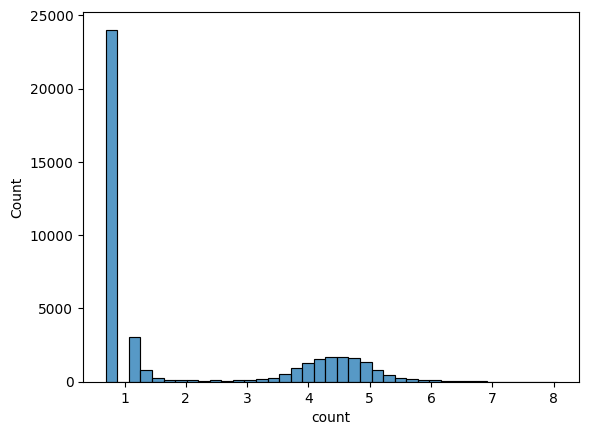

In [63]:
sns.histplot(matrix_gene['count'])

In [64]:
matrix_gene = matrix[matrix['value']=='TPT1']
m = statistics.mean(matrix_gene['count'])
#matrix_gene = matrix_gene[matrix_gene['count']>m].reset_index(drop=True)
matrix_gene = matrix_gene[matrix_gene['count']>4.5].reset_index(drop=True)
g_list = list(matrix_gene['barcode'].drop_duplicates())
barcode_tpt1 = matrix[['barcode_id','barcode']].drop_duplicates()
barcode_tpt1['TPT1'] = barcode_tpt1['barcode'].apply(lambda x: 1 if x in g_list else 0 )

In [57]:
matrix_gene = matrix[matrix['value']=='EEF1A1']
m = statistics.mean(matrix_gene['count'])
matrix_gene = matrix_gene[matrix_gene['count']>m].reset_index(drop=True)
g_list = list(matrix_gene['barcode'].drop_duplicates())
barcode_e1 = matrix[['barcode_id','barcode']].drop_duplicates()
barcode_e1['EEF1A1'] = barcode_e1['barcode'].apply(lambda x: 1 if x in g_list else 0 )

In [58]:
matrix_gene = matrix[matrix['value']=='DNAJB1']
m = statistics.mean(matrix_gene['count'])
matrix_gene = matrix_gene[matrix_gene['count']>m].reset_index(drop=True)
g_list = list(matrix_gene['barcode'].drop_duplicates())
barcode_d1 = matrix[['barcode_id','barcode']].drop_duplicates()
barcode_d1['DNAJB1'] = barcode_d1['barcode'].apply(lambda x: 1 if x in g_list else 0 )

In [65]:
data_annot = pd.read_csv(annot_path,sep=',')

In [66]:
data = pd.merge(data_annot, barcode_gene, on = pairing_id)

In [67]:
data.shape

(15817, 33)

In [68]:
data = pd.merge(data, barcode_tpt1[[pairing_id,'TPT1']], on = pairing_id)

In [69]:
data = data.rename({'cdr3':'cdr3aa','v_gene':'v','j_gene':'j','top_tetramer':label},axis=1)

In [70]:
data = data_proc.annot_id(data, clonotype_index)

In [71]:
data_prebuilt = data_proc.remove_asterisk(data, tcr_columns)
data_prebuilt = data_proc.remove_backslash(data_prebuilt, tcr_columns)
data_prebuilt = data_proc.filter_clones_data(data_prebuilt, tcr_columns)
data_prebuilt = data_prebuilt[data_prebuilt['high_confidence']==True]
data_prebuilt = data_prebuilt[data_prebuilt['is_cell']==True]
data_prebuilt = data_prebuilt[data_prebuilt['chain']!='Multi']

data_prebuilt = data_proc.filter_segments(data_prebuilt)
data_prebuilt.shape

(9093, 35)

In [72]:
data_prebuilt = data_prebuilt.sort_values(['umis','reads'],ascending=False).drop_duplicates(['barcode','chain'])
print(data_prebuilt.shape)

(8249, 35)


In [73]:
label_high = str(label + '_freq')

In [74]:
data_prebuilt = data_proc.freq_labels(label, clonotype_index, data_prebuilt, n = 8)
data_prebuilt = data_proc.freq_labels_tr_list(label, clonotype_index, data_prebuilt, [10,20,30,50,100,500,1000])

In [75]:
data_prebuilt.drop_duplicates('top_gene_freq')

,barcode,is_cell,contig_id,high_confidence,length,chain,v,d_gene,j,c_gene,...,TPT1,data_id,top_gene_freq,top_gene_freq_10,top_gene_freq_20,top_gene_freq_30,top_gene_freq_50,top_gene_freq_100,top_gene_freq_500,top_gene_freq_1000
2053,AGGACCAAGATTCAAC-1,True,AGGACCAAGATTCAAC-1_contig_2,True,520,TRB,TRBV12-4,NaN,TRBJ2-5,TRBC2,...,1,3503,other,ACTB,other,other,other,other,other,other
5675,CGTCGTCTCATTCGCT-1,True,CGTCGTCTCATTCGCT-1_contig_1,True,474,TRB,TRBV29-1,TRBD1,TRBJ2-2,TRBC2,...,0,9875,B2M,B2M,B2M,B2M,B2M,B2M,other,other
7497,GGAGGTCAGACACCGT-1,True,GGAGGTCAGACACCGT-1_contig_1,True,478,TRB,TRBV28,NaN,TRBJ2-1,TRBC2,...,1,13127,DNAJB1,DNAJB1,DNAJB1,DNAJB1,DNAJB1,DNAJB1,other,other
1899,AGCCGTGTCCTTAGTC-1,True,AGCCGTGTCCTTAGTC-1_contig_1,True,469,TRB,TRBV2,NaN,TRBJ2-7,TRBC2,...,1,3236,EEF1A1,EEF1A1,EEF1A1,EEF1A1,EEF1A1,EEF1A1,EEF1A1,EEF1A1
5551,CGGTCGATCAAGTCCA-1,True,CGGTCGATCAAGTCCA-1_contig_1,True,471,TRB,TRBV29-1,NaN,TRBJ2-2,TRBC2,...,1,9641,HSP90AB1,HSP90AB1,HSP90AB1,HSP90AB1,HSP90AB1,HSP90AB1,other,other
2587,ATAGGAGGTAAACCGT-1,True,ATAGGAGGTAAACCGT-1_contig_2,True,524,TRB,TRBV20-1,NaN,TRBJ2-5,TRBC2,...,0,4446,HSPA1A,HSPA1A,HSPA1A,HSPA1A,HSPA1A,HSPA1A,other,other
8955,GTTATCGAGGCAGGGT-1,True,GTTATCGAGGCAGGGT-1_contig_1,True,471,TRB,TRBV29-1,NaN,TRBJ1-2,TRBC1,...,1,15582,FTH1,FTH1,FTH1,FTH1,FTH1,FTH1,other,other
1158,ACCCAACAGACTAATC-1,True,ACCCAACAGACTAATC-1_contig_1,True,465,TRB,TRBV29-1,NaN,TRBJ2-3,TRBC2,...,1,1966,TPT1,TPT1,TPT1,TPT1,TPT1,TPT1,other,other
6886,GCGAAAGTCCGCAATA-1,True,GCGAAAGTCCGCAATA-1_contig_1,True,512,TRB,TRBV6-5,NaN,TRBJ1-2,TRBC1,...,1,12042,RPS12,RPS12,RPS12,RPS12,RPS12,other,other,other


In [76]:
data_a = data_prebuilt[data_prebuilt['chain']=='TRA'][['cdr3aa','v','j']+[ pairing_id, label, label_high,'TPT1']].reset_index(drop='True')
#data_a = data_a.rename({'cdr3aa':'a_cdr3aa','v':'TRAV','j':'TRAJ'},axis=1)
data_a = data_a.rename({'cdr3aa':'a_cdr3aa','v':'a_v','j':'a_j'},axis=1)
data_b = data_prebuilt[data_prebuilt['chain']=='TRB'][['cdr3aa','v','j'] + [pairing_id, label, label_high,'TPT1']].reset_index(drop='True')
#data_b = data_b.rename({'cdr3aa':'b_cdr3aa','v':'TRBV','j':'TRBJ'},axis=1)
data_b = data_b.rename({'cdr3aa':'b_cdr3aa','v':'b_v','j':'b_j'},axis=1)


In [77]:
data_paired = data_a.merge(data_b,how='outer')
data_paired

,a_cdr3aa,TRAV,TRAJ,barcode,top_gene,top_gene_freq,TPT1,b_cdr3aa,TRBV,TRBJ
0,CAIPRGGNKLTF,TRAV12-3,TRAJ10,AGGACCAAGATTCAAC-1,ACTB,other,1,CASSSTEGLARRETQYF,TRBV12-4,TRBJ2-5
1,CATVAGGTSYGKLTF,TRAV17,TRAJ52,GCAATTGTCCATTGTC-1,EEF1A1,EEF1A1,0,CSATETGGSRFHGYTF,TRBV20-1,TRBJ1-2
2,CAATTSNFGNEKLTF,TRAV13-1,TRAJ48,GTCGGAAAGCTAAATC-1,EEF1A1,EEF1A1,1,CSAVRDSYNEQFF,TRBV20-1,TRBJ2-1
3,CAYRGSGNQFYF,TRAV38-2DV8,TRAJ49,ATGGCGGCACTCCGAA-1,EEF1A1,EEF1A1,1,CASTTAGGWNEQFF,TRBV2,TRBJ2-1
4,CVVNIYTGRRALTF,TRAV12-1,TRAJ5,CGGGTACGTACTGCGA-1,EEF1A1,EEF1A1,1,CASSNPTSDSFRRGETQYF,TRBV7-2,TRBJ2-5
...,...,...,...,...,...,...,...,...,...,...
4705,NaN,NaN,NaN,CTGTATGAGACTACAT-1,RPL13,other,1,CAIRATGTYEQYF,TRBV10-3,TRBJ2-7
4706,NaN,NaN,NaN,CTATCACTCAATCGTG-1,DNAJB1,DNAJB1,1,CASSMLQGNTGELFF,TRBV19,TRBJ2-2
4707,NaN,NaN,NaN,ACCTAGTCACCGACAC-1,EEF1A1,EEF1A1,1,CASSSRGGSINQPQHF,TRBV28,TRBJ1-5
4708,NaN,NaN,NaN,CATGCACAGGTCCCGA-1,APOD,other,1,CASSIPGGNTEAFF,TRBV19,TRBJ1-1


In [55]:
data_output_path

'data/data_preped/10x_annot_data_10k_Human_DTC_Melanoma.txt'

In [79]:
data_paired.to_csv(data_output_path,sep='\t', index = False)